<a href="https://colab.research.google.com/github/shazzad-hasan/deep-learning-from-first-principles/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!git clone https://github.com/shazzad-hasan/deep-learning-from-first-principles.git

Cloning into 'deep-learning-from-first-principles'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (252/252), done.
remote: Total 255 (delta 5), reused 237 (delta 0), pack-reused 0
Receiving objects: 100% (255/255), 4.99 MiB | 10.51 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/deep-learning-from-first-principles/cat_vs_dog

/content/deep-learning-from-first-principles/cat_vs_dog


In [4]:
!ls

test  train


## Load and visualize the dataset

In [5]:
# import requird libraries
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

In [6]:
train_dir = 'train/'
test_dir = 'test/'

train_images = [train_dir+i for i in os.listdir(train_dir)]
test_images =  [test_dir+i for i in os.listdir(test_dir)]

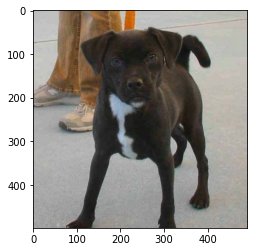

In [7]:
index = 10
img = cv2.imread(train_images[index])
plt.imshow(img)

In [8]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [9]:
ROWS = 64
COLS = 64
CHANNELS = 3

def prepare_data(images):
    m = len(images)
    X = np.zeros((m, ROWS, COLS, CHANNELS), dtype=np.uint8)
    y = np.zeros((1, m))
    for i, image_file in enumerate(images):
        X[i,:] = read_image(image_file)
        if 'dog' in image_file.lower():
            y[0, i] = 1
        elif 'cat' in image_file.lower():
            y[0, i] = 0
    return X, y

In [10]:
train_x, train_y = prepare_data(train_images)
test_x, test_y = prepare_data(test_images)

m_train = train_x.shape[0]
m_test = test_x.shape[0]
num_px = train_x.shape[1]

print ("Number of training images = " + str(m_train))
print ("Number of testing images= " + str(m_test))
print ("Image dimension (h,w,c): (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training images = 202
Number of testing images= 30
Image dimension (h,w,c): (64, 64, 3)


In [11]:
train_x_flatten = train_x.reshape(ROWS*COLS*CHANNELS, -1).T
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_x = train_x_flatten/255
test_set_x = test_x_flatten/255

In [12]:
print ("train_set_x_flatten shape: " + str(train_x_flatten.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x_flatten shape: " + str(test_x_flatten.shape))
print ("test_set_y shape: " + str(test_y.shape))
print ("sanity check after reshaping: " + str(train_x_flatten[0:5,0]))

train_set_x_flatten shape: (202, 12288)
train_set_y shape: (1, 202)
test_set_x_flatten shape: (12288, 30)
test_set_y shape: (1, 30)
sanity check after reshaping: [ 85  84 111  40  42]


## Define a model

In [13]:
def sigmoid(z):
  return 1/(1+np.exp(z))

In [14]:
def initialize_with_zeros(d):
  w = np.zeros((d,1))
  b = 0
  return w, b

In [15]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [33]:
def propagation(w, b, X, Y):
  m = X.shape[1]

  # forward propagation
  z = np.dot(w.T, X) + b
  A = sigmoid(z)
  L = [(Y[0][i] * np.log(A[0][i]) + (1-Y[0][i]) * np.log(1-A[0][i])) for i in range(m)]
  cost = (-1/m) * np.sum(L)

  # backpropagation
  dw = (1/m) * np.dot(X, (A-Y).T)
  db = (1/m) * np.sum((A-Y))

  assert(dw.shape == w.shape)
  assert(db.dtype == float)
  cost = np.squeeze(cost)
  assert(cost.shape == ())

  cost = np.squeeze(cost)
  gradients = {"dw":dw, "db":db}

  return cost, gradients

In [39]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
cost, grads = propagation(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[-0.33178935]
 [-0.99507239]]
db = -0.3347889114701175
cost = 3.0015453193941504


## Train the model

In [34]:
def optimize(w, b, X, Y, learning_rate, num_iterations):
  costs = []

  for i in range(num_iterations):
    cost, gradients = propagation(w, b, X, Y)

    dw = gradients["dw"]
    db = gradients["db"]

    w -= learning_rate * dw
    b -= learning_rate * db

    if i % 100 == 0:
      costs.append(cost)

    if i%100 == 0:
      print("Cost after iteration %i: %f" %(i, cost))  

    parameters = {"w": w, "b": b}
    gradients = {"dw": dw, "db": b}

    return parameters, gradients, cost

## Evaluate the performance of our trained model on a test dataset!

In [35]:
def predict(w, b, X):
  m = X.shape[1]
  predicted_Y = np.zeros((1,m))
  w = w.reshape(X.shape[0],1)
  z = np.dot(w.T, X) + b
  A = sigmoid(z)

  for i in range(A.shape[1]):
    if A[0, i] > 0.5:
      predicted_Y[0, i] = 1
    else:
      predicted_Y[0, i] = 0
  return predicted_Y